In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def closestSquare (array):
    a = np.floor (np.sqrt (array.shape[0]))
    while array.shape[0] % a:
        a -= 1
    return (int(a), int(array.shape[0]/a))

def printImageArray (array):
    print ("shape: ", array.reshape (closestSquare (array)).shape)
    plt.imshow (array.reshape (closestSquare (array)))
    plt.colorbar ()
    plt.show ()

def printArray (array):
    plt.plot (array)
    plt.show ()

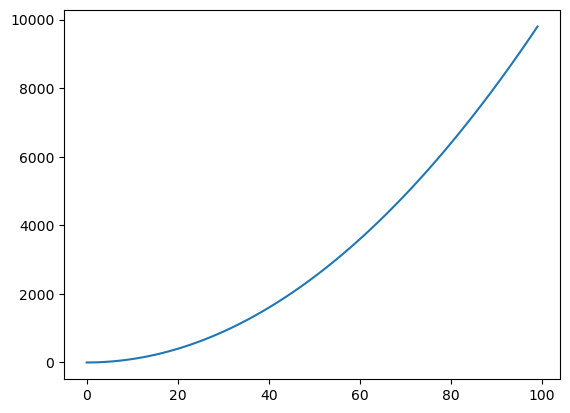

In [25]:
n = np.arange (0, 100)
# n = np.linspace (0, 4*np.pi, 100)

# x = (.5)**n + (.25)**n
x = n**2
# x = np.sin (n * 4)

printArray (x)

In [26]:
r = []
r.append (np.mean (x**2))
r.append (np.mean (x[0:-2] * x[1:-1]))
r.append (np.mean (x[0:-3] * x[2:-1]))
r.append (np.mean (x[0:-4] * x[3:-1]))
r.append (np.mean (x[0:-5] * x[4:-1]))

r

[19503333.3, 18444162.0, 18158960.0, 17874452.666666668, 17590661.8]

In [27]:
R = np.transpose (r [1:6])
R

array([18444162.        , 18158960.        , 17874452.66666667,
       17590661.8       ])

In [28]:
FI = np.array ([
    [r[1], r[2], r[3], r[4]],
    [r[2], r[1], r[2], r[3]],
    [r[3], r[2], r[1], r[2]],
    [r[4], r[3], r[2], r[1]]
])
FI

array([[18444162.        , 18158960.        , 17874452.66666667,
        17590661.8       ],
       [18158960.        , 18444162.        , 18158960.        ,
        17874452.66666667],
       [17874452.66666667, 18158960.        , 18444162.        ,
        18158960.        ],
       [17590661.8       , 17874452.66666667, 18158960.        ,
        18444162.        ]])

In [29]:
A = np.linalg.inv(FI) * R
A

array([[ 3.25900180e+01, -3.17959177e+01,  1.80746956e-03,
         2.04092249e-01],
       [-3.22952998e+01,  6.35930760e+01, -3.12995550e+01,
         1.77877255e-03],
       [ 1.86507873e-03, -3.17977494e+01,  6.25967251e+01,
        -3.08008407e+01],
       [ 2.13994820e-01,  1.83623902e-03, -3.12977520e+01,
         3.10819209e+01]])

In [30]:
xhad = [0 for i in range(1, 101)]

for m in range (4, 100):
    temp = np.sum((A[0]*x[m-1] + A[1]*x[m-2] + A[2]*x[m-3] + A[3]*x[m-4]))
    xhad[m] = temp

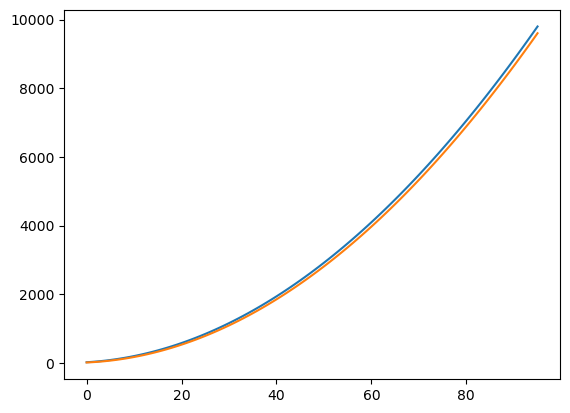

In [31]:
plt.plot (x[4:])
plt.plot (xhad[4:])
plt.show ()